In [1]:
import ase
import numpy as np
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
#%matplotlib

In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm)
# periodic boundaries
struct1 = ase.io.read("res_structs/svd_normd_pbc.cfg")
view(struct1)
hist, distBins = stats.computePPDF(struct1,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct1))

In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm) with different starting points
struct2 = ase.io.read("res_structs/svd_normd_pbc_2.cfg")
view(struct2)
hist, distBins = stats.computePPDF(struct2,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct2))

In [ ]:
# structure resulting from svd optimization (l1-norm/l2-norm)
# non periodic boundaries
struct3 = ase.io.read("res_structs/svd_normd_npbc.cfg")
view(struct3)
hist, distBins = stats.computePPDF(struct3,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct3))

In [ ]:
struct = ase.io.read("res_structs/svd_normd_C70.cfg")
view(struct)
hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=80)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct))
print(struct.get_cell())

In [ ]:
struct4 = ase.io.read("res_structs/dump_50A.cfg")
view(struct4)
#hist, distBins = stats.computePPDF(struct4,binSize=0.1,numBins=250,projectedAxis=None)
hist, distBins = stats.computeRDF(struct4,binSize=0.1,numBins=250)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct4))

In [ ]:
struct5 = su.gen_struct(Natoms=70,seed=50)
struct5.set_pbc((1,1,1))
view(struct5)
hist, distBins = stats.computePPDF(struct5,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct5))
print(struct5.get_cell())

In [ ]:
struct = ase.io.read("res_structs/size_test/batchC100.cfg")
view(struct)
hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=80,projectedAxis=None)
h = p.plot(distBins,hist)
p.xlabel("Distance in A")
p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
print("Density of struct: %f (A⁻3)" %stats.density(struct))
print(struct.get_cell())
print(np.shape(hist))
print(np.shape(distBins))

In [7]:
l_list = [0,1,3,5,7,9,5,5,5,5,5,5,5,5,5,5,5,5]
n_list = [5,5,5,5,5,5,2,4,5,8,10,12,5,5,5,5,5,5]
r_list = [10,10,10,10,10,10,10,10,10,10,10,10,2,4,5,8,10,12] 

In [ ]:
for i in np.arange(12,17+1):
    filename = "batch" + "l" + str(l_list[i]) + "n" + str(n_list[i]) + "r" + str(r_list[i]) + ".cfg"
    struct = ase.io.read("res_structs/param_test/" + filename)
    hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=80)
    h = p.plot(distBins,hist,label=filename)
p.xlabel("Distance in A")
p.legend()
p.show()

In [ ]:
# average over structs in the batch of 10
%matplotlib notebook
Nbins = 150
hists = np.zeros((10,Nbins))
for i in np.arange(10):
    filename = "batch" + str(i) + ".cfg"
    struct = ase.io.read("res_structs/x0_test/" + filename)
    pdf, distBins = stats.simpleRDF(struct,numBins=Nbins,rCut=20)
    #hist, distBins = stats.computePPDF(struct,binSize=0.1,numBins=Nbins,projectedAxis=None)
    #hist, distBins = stats.computeRDF(struct,binSize=0.1,numBins=Nbins)
    hists[i,:] = pdf[:]
    #hists[i,:] = hist[:,0]
    #hists[i,:] = hist[:]
meanHist = np.mean(hists,0)

In [ ]:
distBins.shape

In [ ]:
p.plot(distBins,meanHist)
print(struct.get_cell())

In [2]:
# results of the run_params.py file
l_time = [1695,1697,1791,1845,1948,2077]
n_time = [993,1559,1832,3097,3380,3927]
r_time = [1868,1770,1730,1678,1587,1492]
l_feval = [15192,15192,15192,15192,15192,15192]
n_feval = [15192,15192,15192,15192,17302,15614]
r_feval = [15192,15192,15192,15192,15192,15192]
l_it = [71,71,71,71,70,71]
n_it = [67,68,64,31,13,40]
r_it = [71,69,70,71,61,71]
lx = [0,1,3,5,7,9]
nx = [2,3,5,8,10,12]
rx = [2,4,5,8,10,12]

In [7]:
%matplotlib qt5
fig, axs = p.subplots(1,3,figsize=[6,4],sharey=True)

axs[0].plot(lx,l_time)
axs[0].set_xlabel('$l_{max}$')
axs[0].set_ylabel('time [s]')
axs[0].set_xticks(lx,lx)
axs[0].text(0.05, 0.95, '(a)', transform=axs[0].transAxes,
      fontsize=16, va='top')

axs[1].plot(nx,n_time)
axs[1].set_xlabel('$n_{max}$')
axs[1].set_xticks(nx,nx)
axs[1].text(0.05, 0.95, '(b)', transform=axs[1].transAxes,
      fontsize=16, va='top')

axs[2].plot(rx,r_time)
axs[2].set_xlabel('$r_{cut} \,[\AA]$')
axs[2].set_xticks(rx,rx)
axs[2].text(0.05, 0.95, '(c)', transform=axs[2].transAxes,
      fontsize=16, va='top')
p.show()

In [ ]:
# results of the run_sizes.py file
nAx = [10,20,30,40,50,60,70,80,90,100,150,200]
nA_times = [1567,1270,1633,1707,1761,1744,1812,1850,1949,2010,2029,2070]
nA_it = [356,78,128,82,91,82,71,62,55,49,33,24]

In [ ]:
p.plot(nAx,nA_times)
p.xlabel('Number of atoms')
p.ylabel('Computation time [s]')

In [15]:
%matplotlib qt5
#struct = ase.io.read("res_structs/dump_50A.cfg")
#struct = su.ran_sample(struct,(15,15,15))
#struct = ase.io.read("res_structs/x0_test/batch4.cfg")
struct = ase.io.read("res_structs/param_test/batchl5n12r10.cfg")
struct.set_pbc((1,1,1))
view(struct)

pdf, distBins = stats.simpleRDF(struct,numBins=100,rCut=15)
#print(pdf)
p.plot(distBins,pdf)
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')

Text(0, 0.5, '$g(r)$')

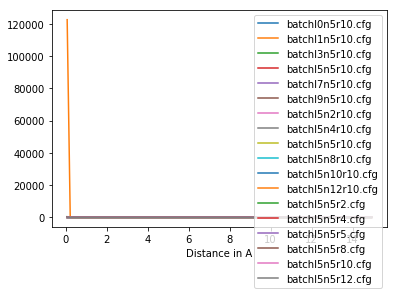

In [11]:
for i in np.arange(0,18):
    filename = "batch" + "l" + str(l_list[i]) + "n" + str(n_list[i]) + "r" + str(r_list[i]) + ".cfg"
    struct = ase.io.read("res_structs/param_test/" + filename)
    hist, distBins = stats.simpleRDF(struct,numBins=100,rCut=15)
    h = p.plot(distBins,hist,label=filename)
p.xlabel("Distance in A")
p.legend()
p.show()